# HW4 for Neural Network and Deep Learning 


## Problem 1

### 1a)
Load libraries and dataset

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.reuters.load_data(
    path="reuters.npz",
    num_words=None,
    skip_top=0,
    maxlen=None,
    test_split=0.2,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3
)

print(x_train.shape, x_test.shape)

We find that training size : testing size = 8:2. Thus we split testing into random halves for validation set.

In [ ]:
# Shuffle testing set
perm=np.random.permutation(range(x_test.shape[0]))
x_test = x_test[perm]
y_test = y_test[perm]

# Split testing set into halves
test_size = int(x_test.shape[0]/2)
x_test, x_valid = x_test[:test_size], x_test[test_size:]
y_test, y_valid = y_test[:test_size], y_test[test_size:]
print('training size:',x_train.shape[0])
print('testing size:',x_test.shape[0])
print('validation size:',x_valid.shape[0])

training size: 8982
testing size: 1123
validation size: 1123


### 1b)
Import dictionary for 'reuters' data, and extract keys as a list sorted by values.

In [ ]:
# Load dictionary
dic = tf.keras.datasets.reuters.get_word_index(path="reuters_word_index.json")

# Sort dic by dic.values, and convert dic.keys into a list
sorted_dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1])}
sorted_dic_keys = list(sorted_dic.keys())
print('first 10 of sorted_dic:',list(sorted_dic.items())[:10])
print('first 10 of sorted_dic_keys:',sorted_dic_keys[:10])

first 10 of sorted_dic: [('the', 1), ('of', 2), ('to', 3), ('in', 4), ('said', 5), ('and', 6), ('a', 7), ('mln', 8), ('3', 9), ('for', 10)]
first 10 of sorted_dic_keys: ['the', 'of', 'to', 'in', 'said', 'and', 'a', 'mln', '3', 'for']


Map x_train data into original words.

In [ ]:
# Define a function to translate numbers into words
def decode(lst, dic):
    n = len(lst)
    ori_word = ''
    for i in range (n):
        ori_word = ori_word + dic[lst[i]-1] + ' '
    print(ori_word)

# Continuously translate x_train
for i in range(len(x_train)):
    decode(x_train[i], sorted_dic_keys)
    if input('Do you want to see next Reuters Clip?[y/n]:') not in ['y','Y','yes','YES','Yes']: break

the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs 
the termination payment airport takes 6 visibility geological 3 6 602 begin up said fully bank expects commodity total is giant a recreation this takes leroy series termination payment airport mln a for capital 1 pre 50 american east said in council takes leroy recommend's france a but u any 4 s 1st losses pct dlrs 
the lt dlrs demand 000 reuter dividend year lt plus billion 04 000 reuter dividend year an worth new vs reuter dlrs warburg on shrs earnings countries new vs reuter 1985 billion vs 2 lt 4 division 000 reuter from go 000 lt plus which mid 000 reuter

### 1c)
Generate dictionary for categories

In [ ]:
values = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing',
'money-supply','coffee','sugar','trade','reserves','ship','cotton',
'carcass','crude','nat-gas','cpi','money-fx','interest','gnp','meal-feed',
'alum','oilseed','gold','tin','strategic-metal','livestock','retail',
'ipi','iron-steel','rubber','heat','jobs','lei','bop','zinc','orange',
'pet-chem','dlr','gas','silver','wpi','hog','lead']
dic_y = {x:values[x] for x in range(46)}
print(dic_y)

{0: 'cocoa', 1: 'grain', 2: 'veg-oil', 3: 'earn', 4: 'acq', 5: 'wheat', 6: 'copper', 7: 'housing', 8: 'money-supply', 9: 'coffee', 10: 'sugar', 11: 'trade', 12: 'reserves', 13: 'ship', 14: 'cotton', 15: 'carcass', 16: 'crude', 17: 'nat-gas', 18: 'cpi', 19: 'money-fx', 20: 'interest', 21: 'gnp', 22: 'meal-feed', 23: 'alum', 24: 'oilseed', 25: 'gold', 26: 'tin', 27: 'strategic-metal', 28: 'livestock', 29: 'retail', 30: 'ipi', 31: 'iron-steel', 32: 'rubber', 33: 'heat', 34: 'jobs', 35: 'lei', 36: 'bop', 37: 'zinc', 38: 'orange', 39: 'pet-chem', 40: 'dlr', 41: 'gas', 42: 'silver', 43: 'wpi', 44: 'hog', 45: 'lead'}


### 1d)
Pad each clip in x sets to longest length, and convert them into tensor.

In [ ]:
# Compute maximum clip length
max_len = x = max(max(map(len, x_train)),max(map(len, x_test)),max(map(len, x_valid)))
print('Largest length in dataset:', max_len)

# Padding clips to maximum length
x_train_pad = list(x + [0] * (max_len - len(x)) for x in x_train)
x_test_pad = list(x + [0] * (max_len - len(x)) for x in x_test)
x_valid_pad = list(x + [0] * (max_len - len(x)) for x in x_valid)
print('length check for x_train_pad[99]:', len(x_train_pad[99]))

# Transform them into tensor
x_train_pad = tf.convert_to_tensor(x_train_pad, dtype ='int64')
x_test_pad = tf.convert_to_tensor(x_test_pad, dtype ='int64')
x_valid_pad = tf.convert_to_tensor(x_valid_pad, dtype ='int64')
print('x_train_pad.shape:', x_train_pad.shape)
tf.print('x_test_pad[0]:', x_test_pad[0])

Largest length in dataset: 2376
length check for x_train_pad[99]: 2376
x_train_pad.shape: (8982, 2376)
x_test_pad[0]: [1 245 153 ... 0 0 0]


In [ ]:
tf.print('x_test_pad[0]:', tf.as_string(x_test_pad)[0])

x_test_pad[0]: ["1" "245" "153" ... "0" "0" "0"]


### 1e)
Here I need to explain that x-like datasets are not 'multi-hot' vectors. Thus these dataset can **NOT** be used as model input.
We need to re-arrange the original dataset to get 'multi-hot' vectors.

In [ ]:
# Function to convert number lists into a joint strings of them.
def int2str(Ds):
    n = len(Ds)
    str_lst = []
    for i in range(n):
        str_lst += list([' '.join(list(str(int) for int in Ds[i]))])
    return str_lst

# convert input datasets into list of strings.
x_train_str = int2str(x_train)
x_test_str = int2str(x_test) 
x_valid_str = int2str(x_valid) 

print('length of x_train_str:', len(x_train_str),'\n')
print('x_train[:2]:\n', x_train[:2],'\n')

length of x_train_str: 8982 

x_train[:2]:
 [list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])] 



Then convert x_str's into 'multi-hot' vectors.

In [ ]:
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers import TextVectorization

sorted_dic_values = list(str(x) for x in sorted_dic.values())   # Actually it's range(30980) exclude '0'
max_tokens = len(sorted_dic_values) + 1                         # for '0'(or null) value

textVectorization=TextVectorization(
    max_tokens=max_tokens,  
    output_mode="multi_hot",
    vocabulary = sorted_dic_values
    )

# Generate multi-hot vectors:
x_train_input = textVectorization(x_train_str)
x_test_input = textVectorization(x_test_str)
x_valid_input = textVectorization(x_valid_str)

print('shape of x_train_input:',x_train_input.shape)
print('check value of x_train_input[:2]:\n',x_train_input[:2])


shape of x_train_input: (8982, 30980)
check value of x_train_input[:2]:
 tf.Tensor(
[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]], shape=(2, 30980), dtype=float32)


Convert target values into categorical.

In [ ]:
y_train_input = keras.utils.to_categorical(y_train, num_classes=46)
y_test_input = keras.utils.to_categorical(y_test, num_classes=46)
y_valid_input = keras.utils.to_categorical(y_valid, num_classes=46)

print('check y_train_input[0](should be 3):\n',y_train_input[0])

check y_train_input[0](should be 3):
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Define the model and fit the model.

In [ ]:
# Define model
def getModel(max_tokens=20000, hidden_dim=16,p=0.5):

    inputs=keras.Input(shape=(max_tokens,))
    tmp=keras.layers.Dense(hidden_dim, activation="relu")(inputs)
    tmp=keras.layers.Dropout(p)(tmp)
    outputs=layers.Dense(46,activation="softmax")(tmp)
    
    model=keras.Model(inputs,outputs)
    model.compile(optimizer="nadam", loss="categorical_crossentropy",metrics=["accuracy"])
    
    return model

model1=getModel(max_tokens, 32, 0.4)
model1.summary()

# Fit model
callbacks=[keras.callbacks.ModelCheckpoint("binary_1gram.keras", save_best_only=True),
           keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True,monitor='val_loss')
          ]
history=model1.fit(x_train_input, y_train_input,
                   validation_data=(x_valid_input, y_valid_input),
                   epochs=200,
                   batch_size=32,
                   callbacks=callbacks)
print(f"test accuracy: {model1.evaluate(x_test_input, y_test_input)[1]:.4f}")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30980)]           0         
                                                                 
 dense (Dense)               (None, 32)                991392    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 46)                1518      
                                                                 
Total params: 992,910
Trainable params: 992,910
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
281/281 [==============================] - 10s 31ms/step - loss: 1.8574 - accuracy: 0.6037 - val_loss: 1.2388 - val_accuracy: 0.7231
Epoch 2/200
281/281 [=====================

Compare target data and predictions.

In [ ]:
def comp(model, x, y, dic):
    for j in range(10):
        i = np.random.randint(len(x))
        pred = model.predict(x)
        pred_class = dic[int(tf.argmax(pred[i]))]
        y_class = dic[int(tf.argmax(y[i]))]
        print('predict category:',pred_class)
        print('actual category:',y_class)
        print('text:')
        decode(x_train[i], sorted_dic_keys)
        print('-------------------------------------------------------------------------\n')
        if input('Check next prediction?[y/n]:') not in ['y','Y','YES','Yes','yes']: break

comp(model1, x_test_input, y_test_input, dic_y)

predict category: grain
actual category: acq
text:
the animal 800 said agency japanese with in changed includes 8 international 887 had vs changed losses a in third revs off said than and trade reserves s in includes 8 mln japan co figures investment 312 from vs losses and francs issued s animal 800 or for while media said out shares diluted a jersey pct dlrs 
-------------------------------------------------------------------------

predict category: interest
actual category: reserves
text:
the in has would seven time 35 but 18 load their loss majority a stevens rose has would reverse adjusted transportation aluminum longest harcourt contrast on stevens reuter harcourt meanwhile on stevens have five 3 revaluation event on stevens a in exchange farm adjusted aluminum 365 transportation longest slight feet on stevens reuter cars on on have five 3 licences on on stevens a exchange farm aluminum longest dlrs remain on stevens reuter dlrs remain on have five 3 billion eddie on stevens a ex

### 1f)
Very similar to 1e, just define TF_IDF vectorization functions and adjust model.

In [ ]:
# TF_IDF vectorization function
idf_weights = [1]*len(sorted_dic_values)
textOnlyTrainTFIF=TextVectorization(
    ngrams=2,
    max_tokens=max_tokens,  
    output_mode="tf_idf",
    vocabulary = sorted_dic_values,
    idf_weights = idf_weights
    )

# Vectorize datasets
x_train_tfidf = textOnlyTrainTFIF(x_train_str)
x_test_tfidf = textOnlyTrainTFIF(x_test_str)
x_valid_tfidf = textOnlyTrainTFIF(x_valid_str)

print('shape of x_train_tfidf:',x_train_tfidf.shape)
print('check value of x_train_tfidf[:2]:\n',x_train_tfidf[:2])

# Get model
model2=getModel(max_tokens, 32, 0.4)
model2.summary()
callbacks=[keras.callbacks.ModelCheckpoint("TFIDF2Gram.keras", save_best_only=True),
           keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True,monitor='val_loss')
          ]

shape of x_train_tfidf: (8982, 30980)
check value of x_train_tfidf[:2]:
 tf.Tensor(
[[86.  1.  0. ...  0.  0.  0.]
 [55.  1.  0. ...  0.  0.  0.]], shape=(2, 30980), dtype=float32)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30980)]           0         
                                                                 
 dense_2 (Dense)             (None, 32)                991392    
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 46)                1518      
                                                                 
Total params: 992,910
Trainable params: 992,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit model
history2=model2.fit(x_train_tfidf, y_train_input,
                   validation_data=(x_valid_tfidf, y_valid_input),
                   epochs=200,
                   batch_size=32,
                   callbacks=callbacks)
print(f"test accuracy: {model2.evaluate(x_test_tfidf, y_test_input)[1]:.4f}")

Epoch 1/200
281/281 [==============================] - 9s 26ms/step - loss: 2.2284 - accuracy: 0.5157 - val_loss: 1.5364 - val_accuracy: 0.6376
Epoch 2/200
281/281 [==============================] - 7s 25ms/step - loss: 1.4494 - accuracy: 0.6555 - val_loss: 1.2918 - val_accuracy: 0.7070
Epoch 3/200
281/281 [==============================] - 7s 25ms/step - loss: 1.1990 - accuracy: 0.7037 - val_loss: 1.1848 - val_accuracy: 0.7346
Epoch 4/200
281/281 [==============================] - 7s 24ms/step - loss: 1.0533 - accuracy: 0.7407 - val_loss: 1.0879 - val_accuracy: 0.7587
Epoch 5/200
281/281 [==============================] - 7s 25ms/step - loss: 0.9257 - accuracy: 0.7584 - val_loss: 1.0214 - val_accuracy: 0.7783
Epoch 6/200
281/281 [==============================] - 7s 27ms/step - loss: 0.8259 - accuracy: 0.7807 - val_loss: 0.9998 - val_accuracy: 0.7703
Epoch 7/200
281/281 [==============================] - 7s 26ms/step - loss: 0.7507 - accuracy: 0.7908 - val_loss: 0.9842 - val_accuracy:

In [ ]:
comp(model2, x_test_tfidf, y_test_input, dic_y)

predict category: money-fx
actual category: money-fx
text:
the estimated initiative dividends growth lt they inc consumers reuter company corp year an they orders on reuter company slight on 1987 from rhone on reuter from assumed on rise down lt they today year reuter company revs year an they ill on reuter company mouth on 1987 4 161 on reuter dlrs 889 on some sold 43 734 executive continued profit rise avg after trading given 40 said corp year april 0 pct dlrs 
-------------------------------------------------------------------------

predict category: crude
actual category: crude
text:
the lt worth year reuter n year an from 130 taxation reuter lane purolator's some 0 services it corp it inc 10 strong a march but pct dlrs 
-------------------------------------------------------------------------

predict category: acq
actual category: acq
text:
the lt company 16 year reuter company london year an company effectively comes reuter company from 416 contain may from entirely involves re

### 1g)
Set text as sequence of words.

In [ ]:
# Set new vectorization function
maxLength=600
maxTokens=max_tokens
dic_GRU = list(str(x) for x in range(maxTokens-2))
textVectorizationSeq=keras.layers.TextVectorization(
    max_tokens=maxTokens,output_mode="int",
    output_sequence_length=maxLength,
    vocabulary = dic_GRU
    )

# Convert datasets into sequence
x_train_seq=textVectorizationSeq(x_train_str)
x_test_seq=textVectorizationSeq(x_test_str)
x_valid_seq=textVectorizationSeq(x_valid_str)

print('shape of x_train_seq:',x_train_seq.shape)
print('check value of x_train_seq[:2]:\n',x_train_seq[:2])

shape of x_train_seq: (8982, 600)
check value of x_train_seq[:2]:
 tf.Tensor(
[[    3 27597 28844 ...     0     0     0]
 [    3  3269   701 ...     0     0     0]], shape=(2, 600), dtype=int64)


Fit model3.

In [ ]:
# Construct model
p=0.5 # dropout rate

inputs=keras.Input(shape=(None,),dtype="int64")
embedded=tf.one_hot(inputs, depth=maxTokens)
tmp=(keras.layers.Bidirectional(layers.GRU(32)))(embedded) # Bidirectional GRU layer
tmp=keras.layers.Dropout(p)(tmp)
outputs=layers.Dense(46,activation="softmax")(tmp)
model3=keras.Model(inputs,outputs)
model3.compile(optimizer="nadam", loss="categorical_crossentropy",metrics=["accuracy"])
model3.summary()

callbacks=[keras.callbacks.ModelCheckpoint("OneHotBiDirGRU.keras", save_best_only=True),
           keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True,monitor='val_loss')
          ]
history3=model3.fit(x_train_seq, y_train_input,
                   validation_data=(x_valid_seq, y_valid_input),
                   epochs=200,
                   batch_size=16,
                   callbacks=callbacks)

print(f"test accuracy: {model3.evaluate(x_test_seq, y_test_input)[1]:.4f}")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot (TFOpLambda)     (None, None, 30980)       0         
                                                                 
 bidirectional (Bidirectiona  (None, 64)               5954688   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 46)                2990      
                                                                 
Total params: 5,957,678
Trainable params: 5,957,678
Non-trainable params: 0
___________________________________________________

InternalError: ignored

### 1h)

In [ ]:
# Define loss function
def custom_loss(model, x, y, k):
    n = len(x)
    p = 0
    pred = model.predict(x)
    for i in range(n):
        if np.argmax(y[i]) in pred[i].argsort()[-k:]: p+=1
    return p/n

# Output accuracy for model1 and model2
print(f"Keras test accuracy of model1: {model1.evaluate(x_test_input, y_test_input)[1]:.4f}")
print(f"custom test accuracy of model1: {custom_loss(model1, x_test_input, y_test_input, 5):.4f}")

print(f"Keras test accuracy of model2: {model2.evaluate(x_test_tfidf, y_test_input)[1]:.4f}")
print(f"custom test accuracy of model2: {custom_loss(model2, x_test_tfidf, y_test_input, 5):.4f}")

36/36 [==============================] - 0s 4ms/step - loss: 0.8985 - accuracy: 0.7934
Keras test accuracy of model1: 0.7934
custom test accuracy of model1: 0.9341
36/36 [==============================] - 0s 6ms/step - loss: 0.9824 - accuracy: 0.7898
Keras test accuracy of model2: 0.7898
custom test accuracy of model2: 0.9252


---
## Problem 2
### 2a)
Import packages and datasets.

In [1]:
# load packages
import numpy as np
import matplotlib.pyplot as plt

import os
print(os.listdir("."))

# GoogleDrive Authorization
if input('Work on google colab?[y/n]:') not in ['y','Y','yes','Yes','YES']:
    Dir = 'C:/Grad_Study/Neural_Network&Deep_Learning/HW2/bitmap/'
else:
    from google.colab import auth
    auth.authenticate_user()
    from googleapiclient.discovery import build
    drive_service = build('drive', 'v3')
    from google.colab import drive
    drive.mount('/content/drive/', force_remount=True)
    Dir = '/content/drive/My Drive/Codes/Grad_Study/Neural Network and Deep Learning/bitmap/'

['.config', 'sample_data']
Work on google colab?[y/n]:y
Mounted at /content/drive/


In [2]:
Ds_class = ['alarm clock', 'ant', 'bear', 'bicycle', 'bowtie', 'calculator',
'camel', 'car', 'cat', 'coffee cup', 'crocodile', 'crown', 'dragon',
'duck', 'elephant', 'eye', 'fan', 'fish', 'hand', 'house']

x = []      # for figure data
y = []      # for response data
cat = 20    # input categories, adjusting for code testing. Resume to 20 after model finishes testing.
for i in range(cat):
    temp = np.load(Dir + 'full_numpy_bitmap_' + Ds_class[i] + '.npy')
    y = y + [i] * np.shape(temp)[0]     # response variable
    x = x + list(temp)                  # bmp data    
x = np.array(x)
y = np.array(y)

In [3]:
# Check data loads
print('x.shape:',x.shape)
print('x[0]:\n',x[0].reshape(28,28))
print('y.shape:',y.shape)
print('y[0]:',y[0])

x.shape: (2850976, 784)
x[0]:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1  21   7   0   0   0   0   0   0   0   0   0   0
    2  91 119 112 102  72   1   0   0   0]
 [  0   0   0   0  94 233 255 250  92   0   0   0   0   0   0   0   0  47
  202 255 255 255 255 255 161   0   0   0]
 [  0   0   0  89 252 187 105 184 251  81   0   0   0   0   0   0   0 201
  225 106   9  14  17 145 250  20   0   0]
 [  0   0  72 251 182   6   0   9 193 243  15   0   3  68  97 127 150 112
   22 241 203  27   0  39 255 101   0   0]
 [  0   0 133 253  16   0   0   0 133 255 173 172 234 255 255 250 232 255
  229 124 238 226  23   7 254 117   0   0]
 [  0   0  70 255  64   0   0  86 252 250 255 225 150 129  40   2   0  52
  201 253 112 244 169  33 255  90   0   0]
 [  0   0  10 249 135   0  88 252 247 234  83   1   0   0   0   0   0   0
    6 188 247 147 255 122 255  64   0   0]
 [  0   0   0 165 243 109 251 246

Data pre-processing.

In [5]:
# Shuffle the data
perm=np.random.permutation(range(x.shape[0]))
x = x[perm]
y = y[perm]

# Split the data into 3 samples
train_size = 5000 * cat
valid_size = 250 * cat
test_size = 1000 * cat
x_train, y_train = x[0:train_size], y[0:train_size]
x_valid, y_valid = x[train_size:(train_size+valid_size)], y[train_size:(train_size+valid_size)]
x_test, y_test = x[(train_size+valid_size):(train_size+valid_size+test_size)], y[(train_size+valid_size):(train_size+valid_size+test_size)]

# Reshape & rescale data
x_train = x_train.reshape(train_size,28,28)    
x_train = x_train.astype('float32')/255
x_valid = x_valid.reshape(valid_size,28,28)    
x_valid = x_valid.astype('float32')/255
x_test = x_test.reshape(test_size,28,28)    
x_test = x_test.astype('float32')/255

# Load necessary packages
from tensorflow import keras
from keras import models
from keras import layers
from keras.layers import BatchNormalization,Input, Dense, Reshape, Conv2D,LeakyReLU, Conv2DTranspose, Flatten, Dropout, GaussianNoise,Concatenate
from keras.models import Model

Construct model.

In [6]:
from keras import backend as K
from functools import partial

#######################
# Encoder layer Setup #
#######################
# Input layer for encoder
inputEncoderLayer=Input(shape=(28,28,1), name="inputEncoderLayer")
# Set up CNN layer for encoder
ConvEncoderLayer=partial(
    Conv2D,
    kernel_initializer='he_uniform',
    kernel_size=(3,3),
    padding='same'
    )

# Dimension for the encoder output
zDim=3 

############################
# Encoder layer structure: #
############################
# Add noise after input layer: 0 for regular autoencoder, 1 for noisy droput, 2 for Gaussian noise
encoderType=0 
if encoderType==1:
  tmp=Dropout(0.5)(inputEncoderLayer)
elif encoderType==2:
  tmp=GaussianNoise(0.1)(inputEncoderLayer)
else:
  tmp=inputEncoderLayer
# Add several CNN layers:
tmp=ConvEncoderLayer(filters=32, strides=1,name="convEncoder1")(tmp)
tmp=LeakyReLU(alpha=0.3)(tmp)
tmp=ConvEncoderLayer(filters=64, strides=2,name="convEncoder2")(tmp)
tmp=LeakyReLU(alpha=0.3)(tmp)
tmp=ConvEncoderLayer(filters=64, strides=2,name="convEncoder3")(tmp)
tmp=LeakyReLU(alpha=0.3)(tmp)
tmp=ConvEncoderLayer(filters=64, strides=1,name="convEncoder4")(tmp)
tmp=LeakyReLU(alpha=0.3)(tmp)
shapeBeforeFlattening=K.int_shape(tmp)[1:]  # Save shape before flattening for decoder, VERY IMPORTANT!
tmp=Flatten()(tmp)
outputEncoderLayer=Dense(zDim,name="desnseEncoder")(tmp)
encoderNetwork=Model(inputEncoderLayer,outputEncoderLayer,name="encoder")
encoderNetwork.summary()

#######################
# Decoder layer Setup #
#######################
# Input layer:
inputDecoderLayer=Input(shape=zDim,name="inputDecoderLayer")
# Set up CNN layer for dncoder
ConvDecoderLayer=partial(
    Conv2DTranspose,
    kernel_size=3,
    padding='same'
    )

############################
# Decoder layer structure: #
############################
# Recover input into shape before flattening in encode process
tmp=Dense(np.prod(shapeBeforeFlattening))(inputDecoderLayer)
tmp=Reshape(shapeBeforeFlattening)(tmp)
# Add reverse CNN layers:
tmp=ConvDecoderLayer(filters=64, strides=1,name="convDecoder1")(tmp)
tmp=LeakyReLU(alpha=0.3)(tmp)
tmp=ConvDecoderLayer(filters=64, strides=2,name="convDecoder2")(tmp)
tmp=LeakyReLU(alpha=0.3)(tmp)
tmp=ConvDecoderLayer(filters=32, strides=2,name="convDecoder3")(tmp)
tmp=LeakyReLU(alpha=0.3)(tmp)
outputDecoderLayer=ConvDecoderLayer(filters=1, strides=1,activation='sigmoid',name="convDecoder4")(tmp)
decoderNetwork=Model(inputDecoderLayer,outputDecoderLayer,name="decoder")
decoderNetwork.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputEncoderLayer (InputLay  [(None, 28, 28, 1)]      0         
 er)                                                             
                                                                 
 convEncoder1 (Conv2D)       (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 convEncoder2 (Conv2D)       (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 convEncoder3 (Conv2D)       (None, 7, 7, 64)          36928     
                                                           

In [28]:
# Concatenate Encoder and Decoder
autoencoderNetwork=Model(inputEncoderLayer,decoderNetwork(outputEncoderLayer),name="autoencoder")

# Define custom loss function::
def autoencoderLoss(yObserved, yPred):
    return K.mean(K.square(yObserved - yPred), axis=[1,2])

# Fit AE model
autoencoderNetwork.compile(optimizer='rmsprop',loss=autoencoderLoss)
autoencoderNetwork.summary()

history_ae=autoencoderNetwork.fit(x=x_train, y=x_train,
                  batch_size=32,
                  shuffle=True,
                  epochs=15)

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputEncoderLayer (InputLay  [(None, 28, 28, 1)]      0         
 er)                                                             
                                                                 
 convEncoder1 (Conv2D)       (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 convEncoder2 (Conv2D)       (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 convEncoder3 (Conv2D)       (None, 7, 7, 64)          36928     
                                                       

Save pre-trained model for later use.

In [31]:
save_dir = '/content/drive/My Drive/Codes/Grad_Study/Neural Network and Deep Learning/pre-trained/AutoEncoder'
autoencoderNetwork.save(save_dir)

INFO:tensorflow:Assets written to: /content/drive/My Drive/Codes/Grad_Study/Neural Network and Deep Learning/pre-trained/AutoEncoder/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Codes/Grad_Study/Neural Network and Deep Learning/pre-trained/AutoEncoder/assets


### 2b)
Set up a funcion for doodle.

In [56]:
import matplotlib.pyplot as plt

def comp_doodle():
  i = np.random.randint(len(x_test))
  print('Doodle Class:',Ds_class[y_test[i]])
  img = x_test[i]
  pred_img = autoencoderNetwork.predict(x_test[i].reshape(1,28,28))
  fig,axs=plt.subplots(1,2)

  axs[0].set_title('Original Image')
  axs[0].imshow(img,cmap='Greys')

  axs[1].set_title('Prediction Image')
  axs[1].imshow(pred_img[0,:,:,0],cmap='Greys')

  plt.show()

Draw both plot several times

Doodle Class: ant


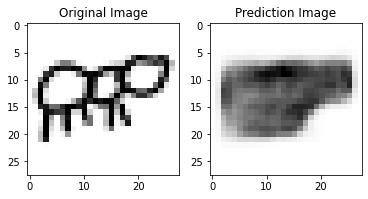

Continue?[y/n]:y
Doodle Class: car


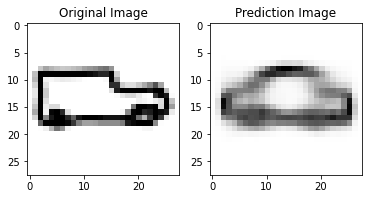

Continue?[y/n]:y
Doodle Class: cat


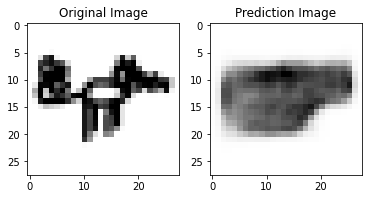

Continue?[y/n]:y
Doodle Class: bowtie


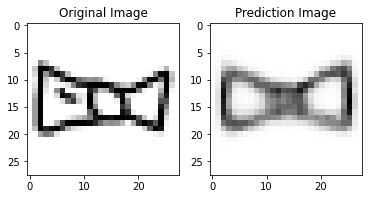

Continue?[y/n]:n


In [70]:
for i in range(10):
  comp_doodle()
  if input('Continue?[y/n]:') not in ['y','Y','yes','Yes','YES']:break

### 2c)
Save the output of encoder, and plot a 3d figure with the output.

{0: 'alarm clock', 1: 'ant', 2: 'bear', 3: 'bicycle', 4: 'bowtie', 5: 'calculator', 6: 'camel', 7: 'car', 8: 'cat', 9: 'coffee cup', 10: 'crocodile', 11: 'crown', 12: 'dragon', 13: 'duck', 14: 'elephant', 15: 'eye', 16: 'fan', 17: 'fish', 18: 'hand', 19: 'house'}


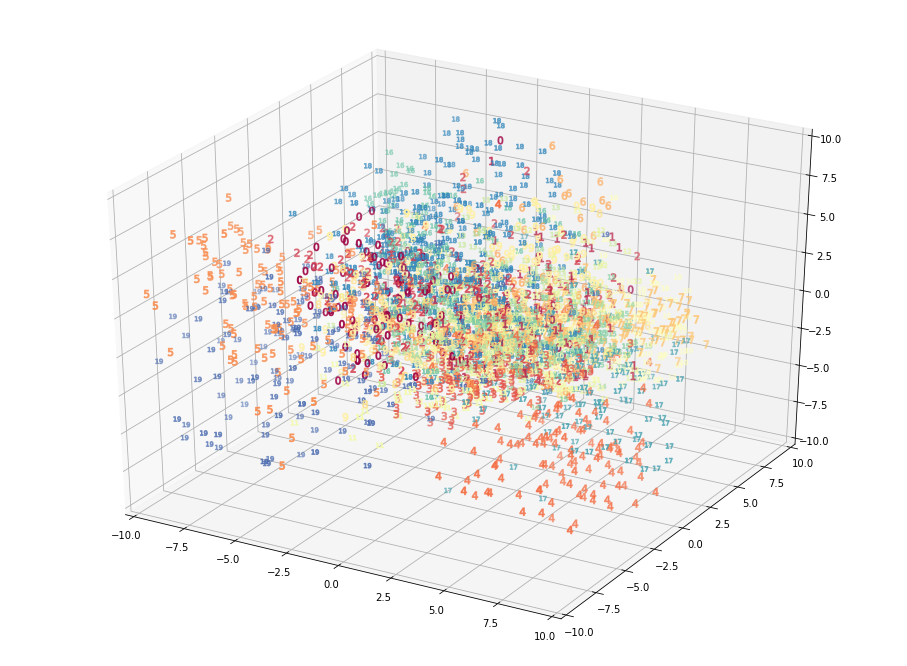

In [181]:
# Set coordinates data from encoder output
MaxDots = min(3000, len(x_train))           # max number of dots in figure
z_resp = encoderNetwork.predict(x_train)
xs = z_resp[:MaxDots,0]
ys = z_resp[:MaxDots,1]
zs = z_resp[:MaxDots,2]

import matplotlib.cm as cm

# Define custom scatter plot function
def mscatter(x,y,z, ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    ax = ax or plt.gca()
    sc = ax.scatter(x,y,z,s=60,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

# Figure parameters:
fig = plt.figure(figsize=(16, 12))      # set figure size
lim = [-10,10]                          # set axis limit

# Set markers and colors
y_lab = list('$'+str(y)+'$' for y in y_train)
spec_c = list(cm.Spectral(i/20.0) for i in range(20))
cList = list(spec_c[y_train[i]] for i in range(MaxDots))

# Set figure
ax = fig.add_subplot(projection='3d')
ax.axes.set_xlim3d(lim) 
ax.axes.set_ylim3d(lim) 
ax.axes.set_zlim3d(lim)
mscatter(xs, ys, zs, m=y_lab[:MaxDots], c=cList)

# Print dictionary for contrast
dic_y20 = dict(zip(range(20),Ds_class))
print(dic_y20)

### 2d)
Define doodle function.

In [228]:
def fake_doodle():
  x_fake = (np.random.rand(3)-0.5)*20
  pred = decoderNetwork.predict(x_fake.reshape(1,3,1))
  fig,axs=plt.subplots()
  axs.set_title('Fake 3D coordinate:'+str(np.round(x_fake,3)))
  plt.imshow(pred[0,:,:,0],cmap='Greys')
  plt.show 

Call the function repeatively

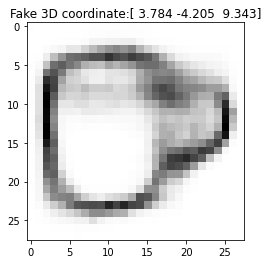

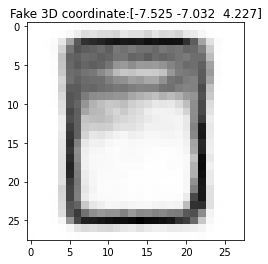

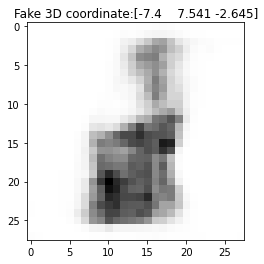

In [231]:
for i in range(3):
  fake_doodle()
  #if input('Generate next fake doodle?[y/n]:') not in ['Y','y','yes','Yes','YES']: break

---
## Problem 3
### 3a)
Construct VAE model.

In [239]:
from keras.layers import Lambda
import tensorflow as tf

# Define sampling layers
def sampling(inputs):
    mean,logVar=inputs
    zSTnormal=K.random_normal(tf.shape(logVar),mean=0.0, stddev=1.)
    return zSTnormal* K.exp(logVar/2) + mean

#######################
# Encoder layer Setup #
#######################
# Input layer for encoder
inputEncoderLayer=Input(shape=(28,28,1), name="inputEncoderLayer")
# Set up CNN layer for encoder
ConvEncoderLayer=partial(
    Conv2D,
    kernel_initializer='he_uniform',
    kernel_size=(3,3),
    padding='same'
    )

# Dimension for the encoder output
zDim=3

############################
# Encoder layer structure: #
############################
# Add several CNN layers:
tmp=ConvEncoderLayer(filters=32, strides=1,name="convEncoder1")(inputEncoderLayer)
tmp=LeakyReLU(alpha=0.3)(tmp)
tmp=ConvEncoderLayer(filters=64, strides=2,name="convEncoder2")(tmp)
tmp=LeakyReLU(alpha=0.3)(tmp)
tmp=ConvEncoderLayer(filters=64, strides=2,name="convEncoder3")(tmp)
tmp=LeakyReLU(alpha=0.3)(tmp)
tmp=ConvEncoderLayer(filters=64, strides=1,name="convEncoder4")(tmp)
tmp=LeakyReLU(alpha=0.3)(tmp)
shapeBeforeFlattening=K.int_shape(tmp)[1:]  # Save shape before flattening for decoder, VERY IMPORTANT!
tmp=Flatten()(tmp)
zMean=Dense(zDim)(tmp)
print("zMean shape:", zMean.shape)
zLogVar=Dense(zDim)(tmp)
print("zLogVar shape:", zLogVar.shape)
outputEncoderLayer=Lambda(sampling,name='denseEncoder')([zMean,zLogVar])
print("outputEncoderLayer shape", outputEncoderLayer.shape)
VEncoderNetwork=Model(inputs=[inputEncoderLayer],outputs=[zMean,zLogVar,outputEncoderLayer],name="vaeEncoder")
VEncoderNetwork.summary()

#######################
# Decoder layer Setup #
#######################
# Input layer:
inputDecoderLayer=Input(shape=[zDim],name="inputDecoderLayer")
# Set up CNN layer for dncoder
ConvDecoderLayer=partial(
    Conv2DTranspose,
    kernel_size=3,
    padding='same'
    )

############################
# Decoder layer structure: #
############################
# Recover input into shape before flattening in encode process
tmp=Dense(np.prod(shapeBeforeFlattening), name="Dense1_BeforeFlatten")(inputDecoderLayer)
tmp=Reshape(shapeBeforeFlattening)(tmp)
# Add reverse CNN layers:
tmp=ConvDecoderLayer(filters=64, strides=1,name="convDecoder1")(tmp)
tmp=LeakyReLU(alpha=0.3)(tmp)
tmp=ConvDecoderLayer(filters=64, strides=2,name="convDecoder2")(tmp)
tmp=LeakyReLU(alpha=0.3)(tmp)
tmp=ConvDecoderLayer(filters=32, strides=2,name="convDecoder3")(tmp)
tmp=LeakyReLU(alpha=0.3)(tmp)
tmp=ConvDecoderLayer(filters=1, strides=1, activation='sigmoid', name="convDecoder4")(tmp)
outputDecoderLayer=Reshape([28,28,1])(tmp)
VDecoderNetwork=Model(inputDecoderLayer,outputDecoderLayer,name="vaedecoder")
VDecoderNetwork.summary()

zMean shape: (None, 3)
zLogVar shape: (None, 3)
outputEncoderLayer shape (None, 3)
Model: "vaeEncoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputEncoderLayer (InputLayer)  [(None, 28, 28, 1)]  0          []                               
                                                                                                  
 convEncoder1 (Conv2D)          (None, 28, 28, 32)   320         ['inputEncoderLayer[0][0]']      
                                                                                                  
 leaky_re_lu_34 (LeakyReLU)     (None, 28, 28, 32)   0           ['convEncoder1[0][0]']           
                                                                                                  
 convEncoder2 (Conv2D)          (None, 14, 14, 64)   18496       ['leaky_re_lu_34[0][0]']         
      

In [241]:
# Concatenate Encoder and Decoder
_,_,zLayer=VEncoderNetwork(inputEncoderLayer)
decoderPart=VDecoderNetwork(zLayer)
vaeNetwork=Model(inputs=[inputEncoderLayer],outputs=decoderPart,name="VAutoEncoder")
zLoss=-0.5*K.sum(1+zLogVar-K.exp(zLogVar)-K.square(zMean),axis=1)
vaeNetwork.add_loss(K.mean(zLoss))

# Define custom loss function
def VAutoEncoderLoss(yObserved, yPred):
    factor=1000   # tweek this factor to various values to see the effect
    return factor*K.mean(K.square(yObserved - yPred), axis=[1,2])

# Fit AE model
vaeNetwork.compile(optimizer='rmsprop',loss=VAutoEncoderLoss)
vaeNetwork.summary()

history_vae=vaeNetwork.fit(x=x_train, y=x_train,
                  batch_size=32,
                  shuffle=True,
                  epochs=15)

Model: "VAutoEncoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputEncoderLayer (InputLayer)  [(None, 28, 28, 1)]  0          []                               
                                                                                                  
 vaeEncoder (Functional)        [(None, 3),          111494      ['inputEncoderLayer[0][0]']      
                                 (None, 3),                                                       
                                 (None, 3)]                                                       
                                                                                                  
 vaedecoder (Functional)        (None, 28, 28, 1)    105153      ['vaeEncoder[1][2]']             
                                                                                       

Save pre-trained model.

In [242]:
save_dir = '/content/drive/My Drive/Codes/Grad_Study/Neural Network and Deep Learning/pre-trained/VAutoEncoder'
autoencoderNetwork.save(save_dir)

INFO:tensorflow:Assets written to: /content/drive/My Drive/Codes/Grad_Study/Neural Network and Deep Learning/pre-trained/VAutoEncoder/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Codes/Grad_Study/Neural Network and Deep Learning/pre-trained/VAutoEncoder/assets


Draw seveal doodle plots with VAE model.

Doodle Class: fan


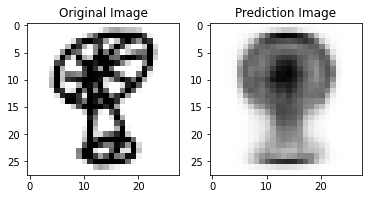

Doodle Class: calculator


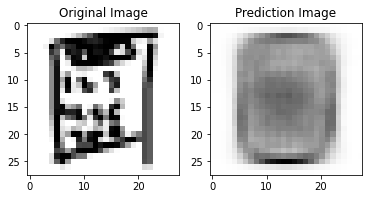

Doodle Class: fish


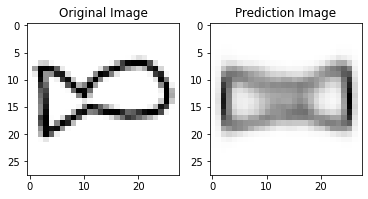

In [244]:
def comp_doodle_vae():
  i = np.random.randint(len(x_test))
  print('Doodle Class:',Ds_class[y_test[i]])
  img = x_test[i]
  pred_img = vaeNetwork.predict(x_test[i].reshape(1,28,28))
  fig,axs=plt.subplots(1,2)

  axs[0].set_title('Original Image')
  axs[0].imshow(img,cmap='Greys')

  axs[1].set_title('Prediction Image')
  axs[1].imshow(pred_img[0,:,:,0],cmap='Greys')

  plt.show()

for i in range(3):
  comp_doodle_vae()

Map doodle data in 3d plot. 

{0: 'alarm clock', 1: 'ant', 2: 'bear', 3: 'bicycle', 4: 'bowtie', 5: 'calculator', 6: 'camel', 7: 'car', 8: 'cat', 9: 'coffee cup', 10: 'crocodile', 11: 'crown', 12: 'dragon', 13: 'duck', 14: 'elephant', 15: 'eye', 16: 'fan', 17: 'fish', 18: 'hand', 19: 'house'}


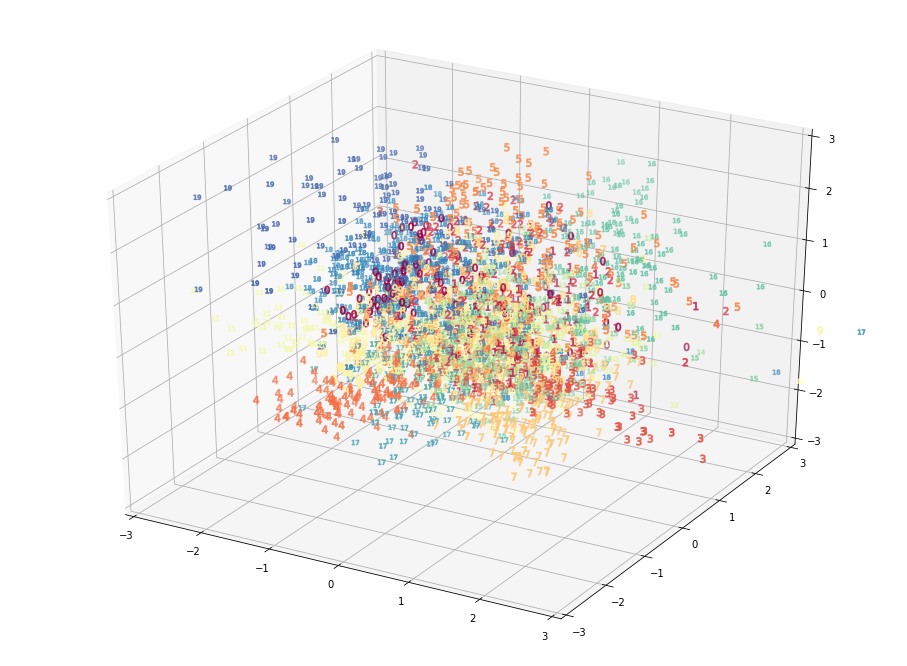

In [258]:
# Set coordinates data from encoder output
MaxDots = min(3000, len(x_train))           # max number of dots in figure
z_resp = VEncoderNetwork.predict(x_train)[0]
xs = z_resp[:MaxDots,0]
ys = z_resp[:MaxDots,1]
zs = z_resp[:MaxDots,2]

# Figure parameters:
fig = plt.figure(figsize=(16, 12))          # set figure size
lim = [-3,3]                              # set axis limit

# Set markers and colors
y_lab = list('$'+str(y)+'$' for y in y_train)
spec_c = list(cm.Spectral(i/20.0) for i in range(20))
cList = list(spec_c[y_train[i]] for i in range(MaxDots))

# Set figure
ax = fig.add_subplot(projection='3d')
ax.axes.set_xlim3d(lim) 
ax.axes.set_ylim3d(lim) 
ax.axes.set_zlim3d(lim)
mscatter(xs, ys, zs, m=y_lab[:MaxDots], c=cList)

# Print dictionary for contrast
dic_y20 = dict(zip(range(20),Ds_class))
print(dic_y20)

Try seveal fake doodles with VAE model.

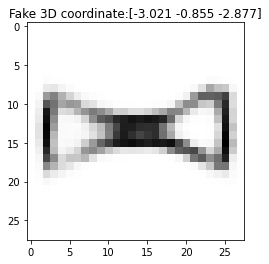

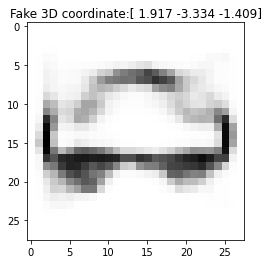

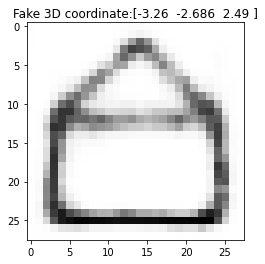

In [260]:
def fake_doodle():
  x_fake = (np.random.rand(3)-0.5)*7
  pred = VDecoderNetwork.predict(x_fake.reshape(1,3,1))
  fig,axs=plt.subplots()
  axs.set_title('Fake 3D coordinate:'+str(np.round(x_fake,3)))
  plt.imshow(pred[0,:,:,0],cmap='Greys')
  plt.show

for i in range(3):
  fake_doodle()